In [14]:
# https://medium.com/@AnasBrital98/introduction-to-support-vector-machine-2a2091401858

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
np.random.seed(42)


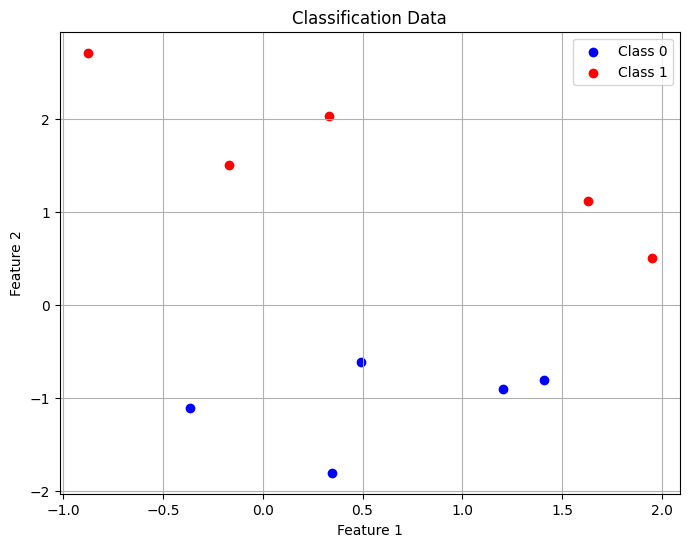

In [16]:
num_samples = 10
num_features = 2

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X, y = gen.get_data(type=type)

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)

In [17]:
def get_accuarcy(y_true , y_pred):
       return np.sum(y_true == y_pred) / len(y_true)
    
def linear_kernel(X):
    return np.dot(X, X.T)

def rbf_kernel(X):
    gamma = 1 / (2 * np.var(X)) 
    dist_sq = np.sum(X**2, axis=1, keepdims=True) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-gamma * dist_sq)



In [18]:
linear_kernel(X).shape
X.shape

(10, 2)

In [19]:
# works for 2 class output
# apply kernels

num_samples, num_features = X.shape

w = np.zeros(num_features)
b = 0

y_ = np.where(y==0 , -1 , 1)

learning_rate = 0.01
lambda_parameter  = 0.01
max_iter = 1000

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        yi =  y_[idx] 
        condition = yi * (np.dot(xi, w) - b) >= 1
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
        w -= learning_rate * dw
        b -= learning_rate * db
        

predictions = np.sign(np.dot(X , w) - b)

get_accuarcy(y_, predictions)


1.0

C:\Users\Proted Stajyer\AppData\Local\Temp\ipykernel_18748\719237634.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0][y==1] , X[:,1][y==1] , cmap=plt.cm.Set1, edgecolor='k')
C:\Users\Proted Stajyer\AppData\Local\Temp\ipykernel_18748\719237634.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0][y==0] , X[:,1][y==0] , cmap=plt.cm.Set1, edgecolor='k')


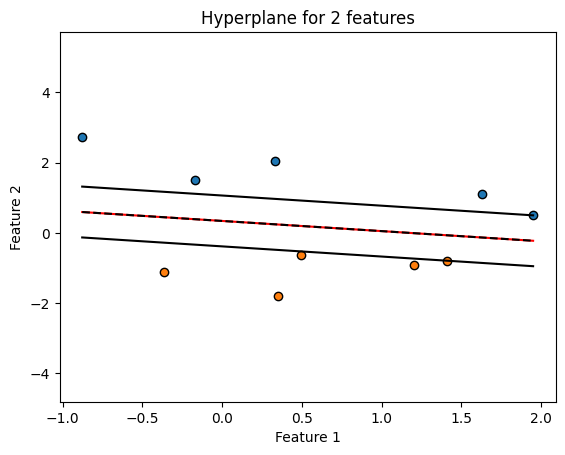

In [37]:
fig , ax = plt.subplots()
ax.scatter(X[:,0][y==1] , X[:,1][y==1] , ,cmap=plt.cm.Set1, edgecolor='k')
ax.scatter(X[:,0][y==0] , X[:,1][y==0] , cmap=plt.cm.Set1, edgecolor='k')

x0_min = np.amin(X[:,0])
x0_max = np.amax(X[:,0])

x1_x_for_separator = (-w[0] * x0_min + b + 0 ) / w[1]
x1_y_for_separator = (-w[0] * x0_max + b + 0 ) / w[1]

x1_x_for_class1 = (-w[0] * x0_min + b -1 ) / w[1]
x1_y_for_class1 = (-w[0] * x0_max + b -1 ) / w[1]

x1_x_for_class2 = (-w[0] * x0_min + b + 1 ) / w[1]
x1_y_for_class2 = (-w[0] * x0_max + b + 1 ) / w[1]

ax.plot([x0_min , x0_max] , [x1_x_for_separator , x1_y_for_separator] , "red")
ax.plot([x0_min , x0_max] , [x1_x_for_class1 , x1_y_for_class1] , "black")
ax.plot([x0_min , x0_max] , [x1_x_for_class2 , x1_y_for_class2] , "black")

hyperplane_slope = -w[0] / w[1]
hyperplane_intercept = b / w[1]
x_values = np.linspace(x0_min, x0_max, 10)
y_values = hyperplane_slope * x_values + hyperplane_intercept 
plt.plot(x_values, y_values, color='k', linestyle='--')

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane for 2 features')
plt.show()


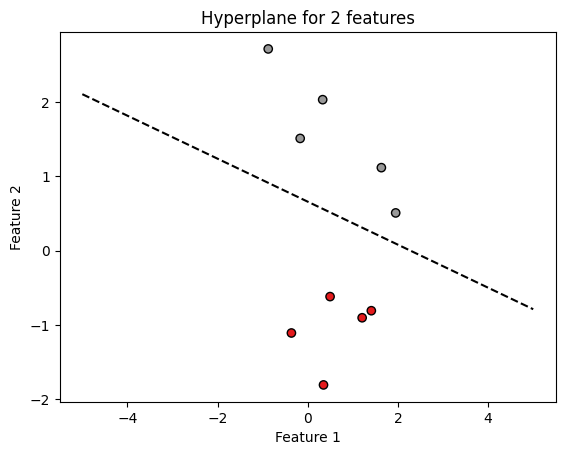

In [30]:

hyperplane_slope = -w[0] / w[1]
hyperplane_intercept = -b / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
x_values = np.linspace(-5, 5, 10)
y_values = hyperplane_slope * x_values + hyperplane_intercept +1
plt.plot(x_values, y_values, color='k', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane for 2 features')
plt.show()
